In [10]:
import pandas as pd
import ast
import numpy as np
from detecto import core, utils, visualize
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt

In [54]:
data = pd.read_csv('data/train.csv')
fn, w, h, cl, boxes, imgid = [], [], [], [], [], []
counter = 0
for i in range(3000):
    idx = int(data['ImageID'].iloc[i])
    bbox = ast.literal_eval(data['bboxes'].iloc[i])
    fn.append(f'{idx}.jpg')
    w.append(256)
    h.append(256)
    cl.append('car')
    boxes.append(bbox)
    imgid.append(counter)
    counter += 1
boxes = np.array(boxes).T
pd.DataFrame(
    {'filename':fn, 
     'width' : w, 
     'height' : h, 
     'class' : cl,
     'xmin' : boxes[0],
     'ymin' : boxes[2],
     'xmax' : boxes[1],
     'ymax':boxes[3],
     'image_id':imgid
    }
).to_csv('data/labels.csv',index = False)

In [55]:
dataset = core.Dataset('data/labels.csv','data/train')
model = core.Model(['car'],pretrained = True)
m = model.fit(dataset,epochs=10, learning_rate=0.001, lr_step_size=5,verbose = True)

  0%|                                                                                 | 1/3000 [00:00<05:38,  8.85it/s]

Epoch 1 of 10
Begin iterating over training dataset


  0%|                                                                                 | 1/3000 [00:00<07:31,  6.64it/s]

Epoch 2 of 10
Begin iterating over training dataset


  0%|                                                                                 | 1/3000 [00:00<07:38,  6.53it/s]

Epoch 3 of 10
Begin iterating over training dataset


  0%|                                                                                 | 1/3000 [00:00<08:46,  5.70it/s]

Epoch 4 of 10
Begin iterating over training dataset


  0%|                                                                                 | 1/3000 [00:00<08:02,  6.21it/s]

Epoch 5 of 10
Begin iterating over training dataset


  0%|                                                                                 | 1/3000 [00:00<07:29,  6.67it/s]

Epoch 6 of 10
Begin iterating over training dataset


  0%|                                                                                 | 1/3000 [00:00<08:26,  5.92it/s]

Epoch 7 of 10
Begin iterating over training dataset


  0%|                                                                                 | 1/3000 [00:00<08:05,  6.17it/s]

Epoch 8 of 10
Begin iterating over training dataset


  0%|                                                                                 | 1/3000 [00:00<08:01,  6.23it/s]

Epoch 9 of 10
Begin iterating over training dataset


  0%|                                                                                 | 1/3000 [00:00<07:56,  6.29it/s]

Epoch 10 of 10
Begin iterating over training dataset


100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [08:31<00:00,  5.87it/s]


In [56]:
out = []
for i in tqdm(range(5000)):
    image = utils.read_image(f'data/test/{i}.jpg')
    labels, boxes, scores = model.predict(image)
    bb = []
    for u,box in enumerate(boxes):
        box = box.cpu().tolist()
        bb.append([box[0],box[2],box[1],box[3],scores[u]])
    out.append(bb)

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [05:34<00:00, 14.95it/s]


In [57]:
def draw_bboxes(img, bboxes, train,color=(255, 0, 0), thickness=1):
    for u, bbox in enumerate(bboxes):
        # if [x1, y1, x2, y2]
        img = cv2.rectangle(img, (int(bbox[0]),int(bbox[2])), (int(bbox[1]),int(bbox[3])), color, thickness)
    return img

<Figure size 432x288 with 0 Axes>

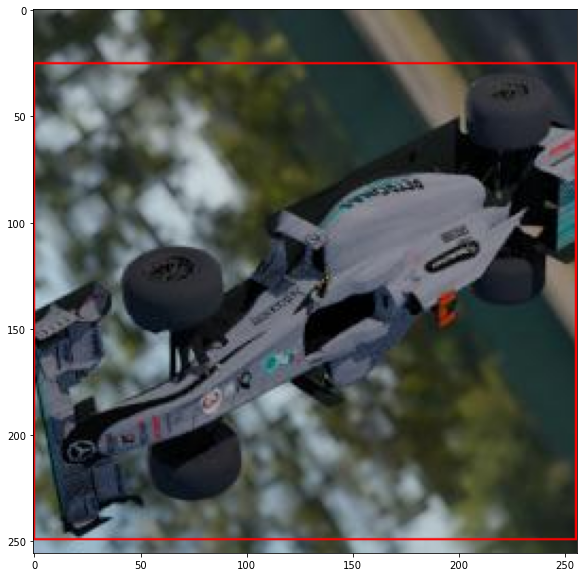

In [64]:
num = 1006
i = utils.read_image(f'data/test/{num}.jpg')
#i = cv2.flip(i,0)
image = draw_bboxes(i,out[num],True)
#image = draw_bboxes(image,t[num],False,(0,255,0))
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(image)

In [65]:
output = []
for o in out:
    o = o[0]
    output.append([[o[0],o[2],o[1],o[3],o[4].item()]])

In [66]:
df = pd.read_csv('data/sample_submission.csv')
df.bboxes = output
df.to_csv('submission.csv',index = False)